#Importações das Dependências

In [ ]:
# installing the Yahoo Finance Library
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
# ignoring future-warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# importing libraries to the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf

# importing machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
# allows pandas_datareader to get yahoo data (returns dataframe)
yf.pdr_override()

# Importando o Dataset

In [ ]:
# setting start and end dates
start_date = "2015-01-01"
end_date = "2020-06-01"

In [ ]:
# loading IBOV Index data inside a dataframe
df_ibov = web.get_data_yahoo('^BVSP', start=start_date, end=end_date)

In [ ]:
X = df_ibov[['Open']]
y = df_ibov[['Close']]

# Dividir em Base de Treino e base de Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Treinando o Modelo e Predizendo

In [ ]:
# criando um objeto do tipo Linear Regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# criando a predição do valor de fechamento, baseado em X (open)
y_pred = regressor.predict(X_test)

# Cálculo do Intercépto e Coeficiente

In [ ]:
# Intercept
print('intercept:', regressor.intercept_)

# Coeficiente (SLOP) = Quanto muda a cada uma mudança de unidade? ou seja, quanto fecha o ibov a cada ponto que muda?
# (Para cada 1 ponto a mais no fechamento do ibov, é 0,99% é modificado no fechamento), valor baixo para o slope
print('Coeficient:', regressor.coef_)

#Close = (coef * open) + intercept

# Comparando os Resultados

In [ ]:
#criando um DF
df_result = pd.DataFrame

df_result = X_test.copy()

#atribuindo a base de testes
df_result['Close'] = y_test.copy()

#criando a coluna de predição
df_result['Prediction'] = y_pred

df_result.head()

In [ ]:
plt.style.use('default')

In [ ]:
df_bar = df_result[['Close', 'Prediction']].head(25)

df_bar

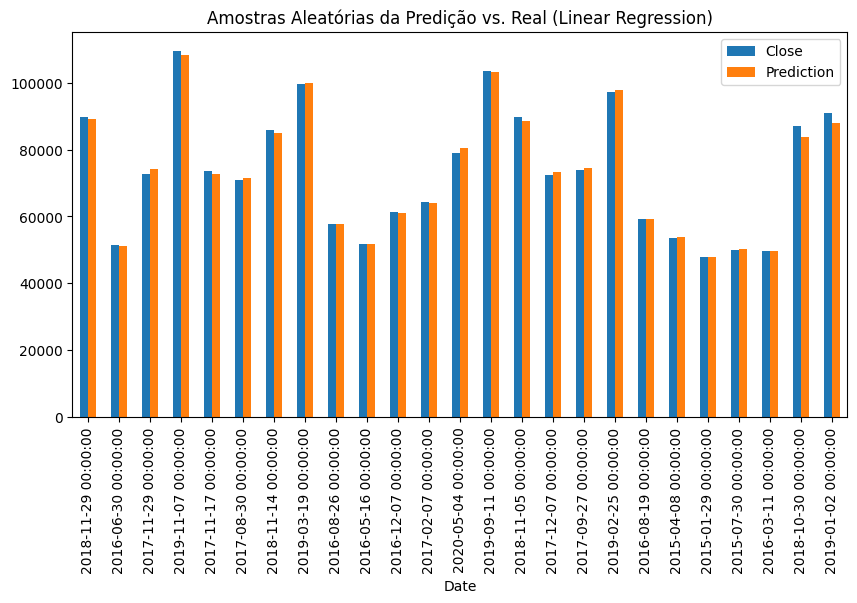

In [ ]:
# Comparing data  
df_bar = df_result[['Close', 'Prediction']].head(25)
df_bar.plot(kind='bar',figsize=(10,5))
plt.title('Amostras Aleatórias da Predição vs. Real (Linear Regression)')
plt.show()

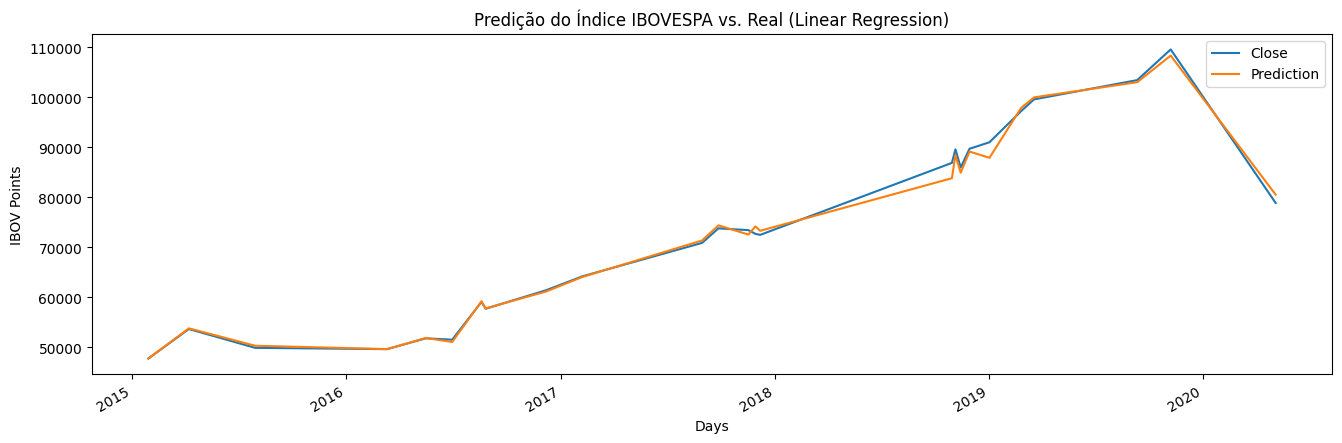

In [ ]:
df_bar.plot.line(figsize=(16, 5))
plt.title('Predição do Índice IBOVESPA vs. Real (Linear Regression)')
plt.xlabel('Days')
plt.ylabel('IBOV Points')
plt.legend(['Close', 'Prediction'])
plt.show()

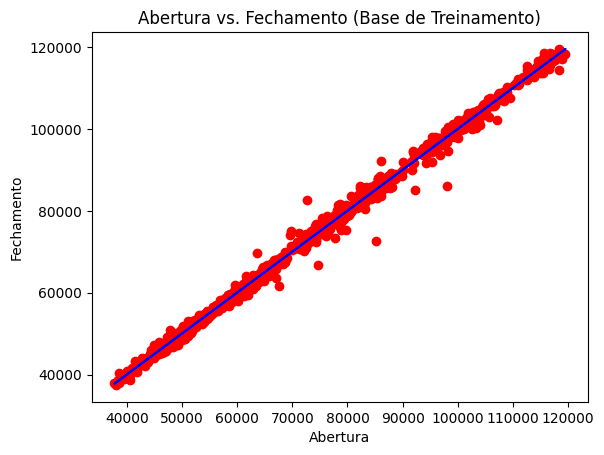

In [ ]:
# Base de Treino
# Comparar o fechamento real com o fechamento predito pelo modelo (Base de Treino 20%)
plt.style.use('default')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Abertura vs. Fechamento (Base de Treinamento)')
plt.xlabel('Abertura')
plt.ylabel('Fechamento')
plt.show()

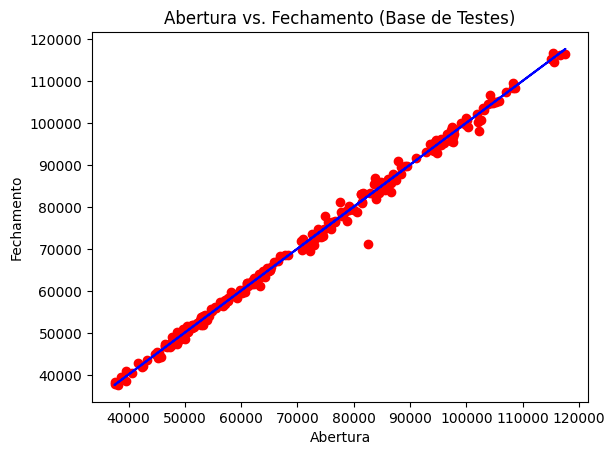

In [ ]:
# Base de Testes
# Comparar o fechamento real com o fechamento predito pelo modelo (Base de Teste 80%)
plt.style.use('default')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Abertura vs. Fechamento (Base de Testes)')
plt.xlabel('Abertura')
plt.ylabel('Fechamento')
plt.show()

# Resultados

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) # *100

In [ ]:
# Important Metrics https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  # em média, meu modelo erra 746 pontos do ibov
print('Mean Absolute Percentage Error', mean_absolute_percentage_error(y_test, y_pred)) # o erro percenteu para todo o modelo é de 1%
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # norma do modelo

Mean Absolute Error: 764.2493954397639
Mean Absolute Percentage Error 0.010939622373822754
Mean Squared Error: 1446373.120808898
Root Mean Squared Error: 1202.6525353604416


In [ ]:
#Erro quadrado R², o quanto uma variavel explica a outra
print(regressor.score(X_test, y_test))

0.9963429661749198
